# Segunda Atividade: Cálculo Numérico

    Lucas Corlete Alves de Melo - 13676461
    Jean Carlos Pereira Cassiano - 13864008
    João Victor de Almeida - 13695424

# Parte 1: Resolução de Redes em Python

### ATENÇÃO!
    Cada resolução de exercício depende das resoluções anteriores. Ou seja, para funcionar, todas as células tem que ser rodadas! 
    Devido a vários números aleatórios estarem sendo gerados, haverão casos extremos, como a Rede de Tipo 2 falhar em 100% dos casos. Quando esse tipo de situação ocorria, apenas rodavamos as células e novo, esperando resultados mais satisfatórios.
    O relatório de cada parte foi feito considerando um resultado de execução do algoritmo.

In [ ]:
# Importando as bibliotecas

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import scipy as sp
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [ ]:
# Dados do enunciado

n, m = 5, 4 #n° de pontos na horizontal e vertical, respectivamente.

# Função para criar uma rede hidraulica com forma de grade quadrada
def GeraRede(n,m,CH,CV):
    nv = n*m
    nc = (n-1)*m + (m-1)*n
    
    coord = np.zeros(shape=(nv,2))

    for i in range(n):
      for j in range(m):
        ig = i + j*n
        coord[ig,0] = i
        coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(m):
        for i in range(n-1):
          k = j*(n-1) + i
          conec[k,0] = j*n + i
          conec[k,1] = j*n + i+1
          C[k] = CH

    # Loop sobre canos verticais
    for i in range(n):
      for j in range(m-1):
          k = (n-1)*m + j*n + i
          conec[k,0] = i + j*n
          conec[k,1] = i + (j+1)*n
          C[k] = CV

    return nv, nc, conec, C, coord

## Exo. A.

In [ ]:
# Primeiro, definindo a montagem de uma matriz global do sistema de equações
def Assembly(nv, nc, C, conec):
    A = np.zeros(shape=(nv,nv))
    for k in range(nc):
        Cloc = np.array([ [C[k] , -C[k]], [-C[k] , C[k] ] ])
        p = conec[k,0]
        q = conec[k,1]
        A[p,p] += Cloc[0,0]
        A[q,q] += Cloc[1,1]
        A[p,q] += Cloc[0,1]
        A[q,p] += Cloc[1,0]
    return A

# Depois, função para plotar o gráfico de pressões.
def PlotPressure(n, m, pressure):
    x = np.arange(0, n, 1)
    y = np.arange(0, m, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (m,n)
    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    cp = plt.contourf(X, Y, Z, 15, cmap='jet')
    cb = plt.colorbar(cp)
    plt.show()


#Tomemos duas funções ResolveRede[tipo] para resolução de cada tipo de conexão.

# Resolução Rede tipo 1.
def ResolveRede1(nv, nc, C, conec, natm, nB, QB):
    A = Assembly(nv, nc, C, conec)
    
    Atilde = np.copy(A)
    Atilde[natm,:] = 0.0
    Atilde[natm,natm] = 1.0
    b = np.zeros(nv, dtype=float)
    b[nB] = QB
    return np.linalg.solve(Atilde, b)

# Resolução Rede tipo 2 - adicionando uma variável consumo -.
def ResolveRede2(nv, nc, C, conec, consumo, nr, Pr): #consumo < 0, sempre!
    A = Assembly(nv, nc, C, conec)

    Atilde = np.copy(A)
    Atilde[nr,:] = 0.0
    Atilde[nr,nr] = 1.0
    b = consumo*np.ones(nv, dtype=float)
    b[nr] = Pr
    return np.linalg.solve(Atilde, b)

# Funções para os outputs solicitados
def solution1(sol, natm, nB):
    PlotPressure(n, m, sol)
    print("\n", sol)
    print("\nO valor máximo de pressão para nossa Rede Tipo 1 é de", np.max(sol))
    print("\nOs valores gerados aleatóriamente foram natm =", natm, "e nB =", nB)


def solution2(sol, nr, Pr, consumo):
    PlotPressure(n, m, sol)
    print("\n", sol)
    print("\nO valor máximo de pressão para nossa Rede Tipo 2 é de", np.max(sol))
    print("\nO valor gerado aleatóriamente foi nr =", nr, ", o nosso consumo foi de", consumo, "e a pressão no nó nr é Pr =", Pr)

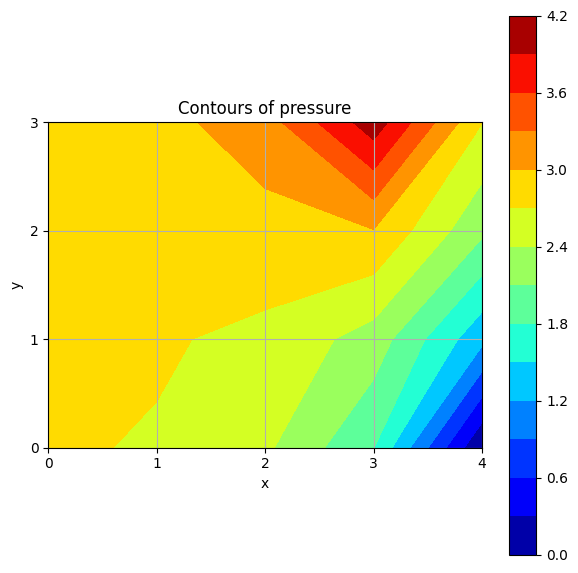


 [ 2.73919559e+00  2.67385489e+00  2.45500835e+00  1.80678742e+00
 -1.59872116e-15  2.76533186e+00  2.73525724e+00  2.62675811e+00
  2.27021401e+00  1.27728503e+00  2.80349799e+00  2.82802938e+00
  2.89772585e+00  2.98819456e+00  2.15739848e+00  2.83185156e+00
  2.90273549e+00  3.16038469e+00  4.07468102e+00  2.70519349e+00]

O valor máximo de pressão para nossa Rede Tipo 1 é de 4.074681015472043

Os valores gerados aleatóriamente foram natm = 4 e nB = 18


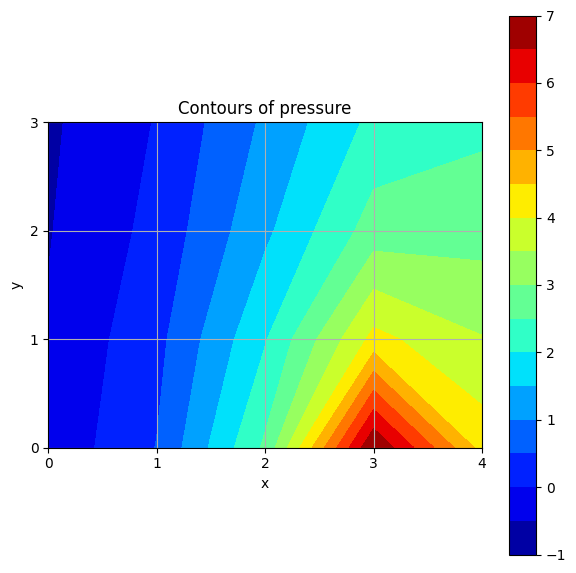


 [-0.38756363  0.51612605  2.59217052  7.          4.30467793 -0.44964621
  0.34657742  1.95884981  4.15278805  3.52594239 -0.53082495  0.15000259
  1.39225605  2.73328296  2.79586188 -0.58494141  0.02825067  1.08554621
  2.12455036  2.39020624]

O valor máximo de pressão para nossa Rede Tipo 2 é de 6.999999999999997

O valor gerado aleatóriamente foi nr = 3 , o nosso consumo foi de -0.7484832325882723 e a pressão no nó nr é Pr = 7.0


In [ ]:
#Testando para duas redes, uma de cada tipo:

#Dados comuns, ARBITRÁRIOS, para as duas redes:

CH, CV = 1.0, 2.5 # VALORES ARBITRÁRIOS

nv, nc, connec, C, coord = GeraRede(n, m, CH, CV) #Vamos usar esta Rede para todos itens da Atividade

#Tipo 1:

# Vamos usar o gerador de inteiros aleatórios pelo próprio python para obter diferentes Redes Tipo 1
natm = random.randint(0, nv - 1)
nB = random.randint(0, nv - 1)

QB = 5.0 # VALOR ARBITRÁRIO
pressure1 = ResolveRede1(nv, nc, C, connec, natm, nB, QB)
solution1(pressure1, natm, nB)


#Tipo 2:

consumo = (-1)*random.random() #Consumo na mesma rede - gerado aleatoriamente no intervalo [0.0, 1.0) -, mas tem que ser negativo!!!!! E teremos um grande problema se o compilador escolher consumo = 0.0.
while (consumo == 0.0):
    consumo = (-1)*random.random()   #forcei o consumo nunca zerar?! Acho que sim.

nr = random.randint(0, 19) #bizurando de novo usando os aleatórios do python 

Pr = 7.0 # VALOR ARBITRÁRIO

pressure2 = ResolveRede2(nv, nc, C, connec, consumo, nr, Pr)
solution2(pressure2, nr, Pr, consumo)

## Exo. B.

In [ ]:
# Criando as funções para resolução do problema

def matrizes_aux(nv, nc, C, connec):
    # Criando a matriz K (diagonal)

    K = np.zeros(shape=(nc,nc))

    for i in range(nc):
        K[i][i] = C[i]

    # Criando a matriz D
    D = np.zeros(shape=(nc,nv))

    for k in range(nc):
        for j in range(nv):
            if(j == connec[k][0]):
                D[k][j] = 1
            elif (j == connec[k][1]):
                D[k][j] = -1

    return K, D


def ResolveRedeB(K, D, p1, p2):
    X = K@D #nos dá que Q = Xp, tal que X = KD

    Q1 = X@p1
    Q2 = X@p2

    return Q1, Q2

def print_flow(Q1, Q2):
    print("\nO vetor de vazões para a Rede Tipo 1 é Q1 =", Q1)
    print("\nO vetor de vazões para a Rede Tipo 2 é Q2 =", Q2)


In [ ]:
#Determinando os vetores de pressões para as Redes Tipo 1 e 2
# obs: tam[p] = [nv,1];

p1 = np.copy(pressure1) #Usaremos os dois no próximo exercício
p2 = np.copy(pressure2)


#Retornando os vetores de vazões, Q1 e Q2, das Redes Tipo 1 e 2, do Exo.A.

K, D = matrizes_aux(nv, nc, C, connec) #Usaremos no próximo exercício

Q1, Q2 = ResolveRedeB(K, D, p1, p2)

Q = print_flow(Q1, Q2)


O vetor de vazões para a Rede Tipo 1 é Q1 = [ 0.06534069  0.21884654  0.64822093  1.80678742  0.03007463  0.10849913
  0.3565441   0.99292898 -0.02453139 -0.06969647 -0.09046871  0.83079608
 -0.07088393 -0.25764921 -0.91429632  1.36948753 -0.06534069 -0.15350585
 -0.42937439 -1.15856648 -3.19321258 -0.09541532 -0.23193036 -0.67741935
 -1.79495136 -2.20028361 -0.07088393 -0.18676528 -0.65664712 -2.71621615
 -1.36948753]

O vetor de vazões para a Rede Tipo 2 é Q2 = [-0.90368968 -2.07604447 -4.40782948  2.69532207 -0.79622363 -1.61227239
 -2.19393824  0.62684566 -0.68082754 -1.24225346 -1.34102691 -0.06257892
 -0.61319208 -1.05729553 -1.03900415 -0.26565588  0.15520645  0.42387156
  1.58330177  7.11802987  1.94683884  0.20294685  0.49143709  1.4164844
  3.54876273  1.82520127  0.13529115  0.30437978  0.76677461  1.52183151
  1.01413911]


## Exo. C.

In [ ]:
# Criando as funções para resolução do problema

def matrizes_trans(D, p1, p2):
    # Criando a matriz D transposta
    D_t = np.zeros(shape=(nv,nc))

    for i in range (nv):
        for j in range(nc):
            D_t[i][j] += D[j][i]

    # Criando as matrizes p1 e p2 transpostas
    p1_t = np.zeros(shape=(1,nv))
    p2_t = np.zeros(shape=(1,nv))

    for k in range(nv):
        p1_t[0][k] += p1[k]
        p2_t[0][k] += p2[k]

    return D_t, p1_t, p2_t


def ResolveRedeC(K, D, D_t, p1_t, p2_t):
    X = K@D  #nos dá que W = p_t(D_t X)p, tal que X = KD
    Y = D_t @ X
    Z1 = Y@p1
    Z2 = Y@p2

    W1 = p1_t @ Z1
    W2 = p2_t @ Z2 

    return W1, W2

def print_pot(W1, W2):
    print("\nO valor da potência para a Rede Tipo 1 é W1 =", W1)
    print("\nO valor da potência para a Rede Tipo 2 é W2 =", W2)


In [ ]:
# Declarandos as matrizes transpostas
D_t, p1_t, p2_t = matrizes_trans(D, p1, p2)

# Declarando as soluções do problema
W1, W2 = ResolveRedeC(K, D, D_t, p1_t, p2_t)

# Soluções!
W = print_pot(W1, W2)


O valor da potência para a Rede Tipo 1 é W1 = [20.37340508]

O valor da potência para a Rede Tipo 2 é W2 = [78.48287332]


## Exo. D.

In [ ]:
# Neste problema, precisaremos de um nova rede, totalmene diferente das anteriores, mas ela será do tipo 2.

alpha, beta = 10, 10

mc_CH, mc_CV = 2.0, 3.0 # VALORES ARBITRÁRIOS

# Criando nova rede
mc_nv, mc_nc, mc_connec, mc_C, mc_coord = GeraRede(alpha, beta, mc_CH, mc_CV)            #mc_nv, mc_nc = 100, 180

# Parâmetros para nova Rede Tipo 2, alguns dados no enunciado
P_r = 5
mc_consumo = -0.1
mc_nr = random.randint(0, (mc_nv - 1))

lst = [0,1,2,30,31,32,93,103,113]        #vetor NOMINAL, com todos os elementos não-negativos e menores que (mc_nc - 1), mas pegamos o exemplo dado em sala 

mc_C[lst] = 20 # VALOR NOMINAL

In [ ]:
# Cálculos de Monte Carlo

def RandomFail(C, a, Centup):
    Cnew = np.copy(C)
    for i, Ci in enumerate(C):
        if(Ci == 2):
            x = np.random.rand()
            if(x < a):
                Cnew[i] = Centup
    
    return Cnew

In [ ]:
a = np.arange(0.02, 0.26, 0.01, dtype=float)     #até 0.26 para ele me dar a última prob de 25%

Centup = 0.2  # VALOR ARBITRÁRIO

probabilidade = []

for i in range(len(a)):
    num_falhas = 0
    nrealizations = 1000       # Para nrealizations = 10000 demorou 6m 14.3s. Dava pra fazer um churrasco com o pc neste meio tempo kkkkkkkk

    for j in range(nrealizations):
        Cnew = RandomFail(mc_C, a[i], Centup)
        sol = ResolveRede2(mc_nv, mc_nc, Cnew, mc_connec, mc_consumo, mc_nr, P_r)
        if (np.min(sol) < 1.15):
            num_falhas += 1
    
    prob = 100*(num_falhas/nrealizations)
    probabilidade.append(prob)


print("\nRealizaremos", nrealizations, "experimentos para cada elemento do vetor a =",a, "de probabilidade do cano entupir, tal que a pressão num cano entupido seja menor que 1.15")
print("\nPara cada valor de 'a' analisado, obtivemos as seguintes probabilidades de falha, em procentagens,\n",probabilidade)


Realizaremos 1000 experimentos para cada elemento do vetor a = [0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15
 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25] de probabilidade do cano entupir, tal que a pressão num cano entupido seja menor que 1.15

Para cada valor de 'a' analisado, obtivemos as seguintes probabilidades de falha, em procentagens,
 [2.1999999999999997, 2.6, 4.7, 5.1, 7.1, 9.3, 11.899999999999999, 13.100000000000001, 15.299999999999999, 15.8, 18.2, 22.8, 22.5, 25.6, 27.700000000000003, 25.4, 33.7, 35.099999999999994, 36.199999999999996, 36.8, 38.4, 39.5, 41.5, 42.699999999999996]


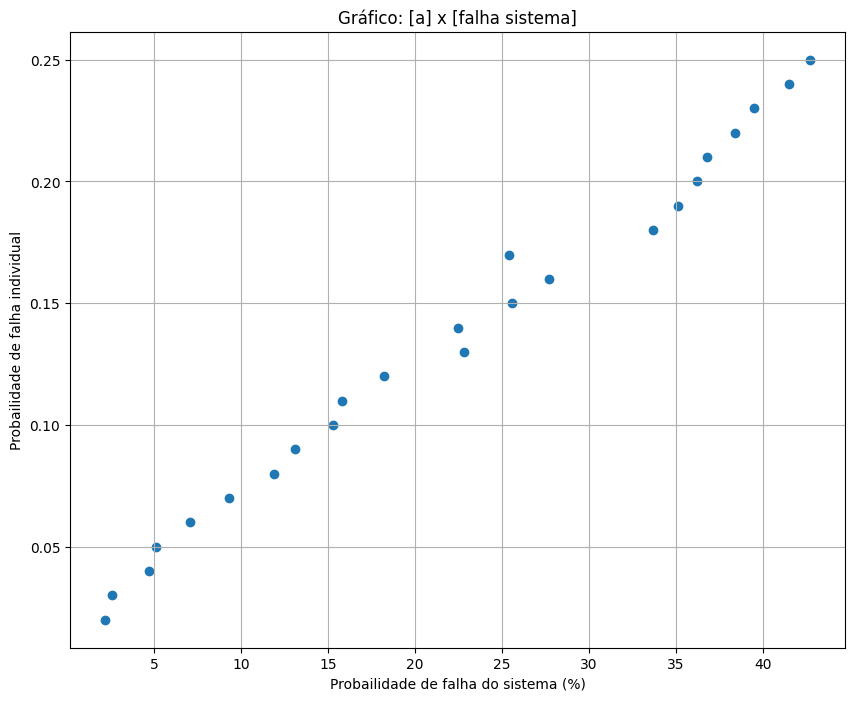

In [ ]:
# Agora vamos plotar o(s) gráfico(s)

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(probabilidade, a)
plt.title("Gráfico: [a] x [falha sistema]")
plt.xlabel("Probailidade de falha do sistema (%)")
plt.ylabel("Probailidade de falha individual")
plt.grid()

# **Ralatório: Parte 1**

#Exercício A:

Em nosso primeiro exercício, haviam dois tipos de redes para serem feitas, foi resolvido uma rede hidráulica com conexões a uma fonte QB, um certo nó nB e outro natm, ambos escolhidos de maneira aleatória. Outra com uma pressão Pr fixada em um certo nó nr e o resto dos nós colocado um consumo. Nesse primeiro exercício, foi pedido para calcular a pressão e plotar o gráfico respectivo de cada.

Portanto, para a resolução das redes, criamos uma função para cada, *ResolveRede1( )* e *ResolveRede2( )*. Cada uma com suas respectivas variáveis e condições. Para ambos, criamos matrizes auxiliares para armazenar os dados e fixar o que foi pedido, para no fim, solucionar a matriz através da função *np.linalg.solve( )*, retornando o resultado.

Além disso, utilizamos funções para os outputs solicitados, para cada parte do exercício, sendo *solution1( )* para a primeira parte e *solution( )2* para a segunda. Usando como parâmetros os nós colocados em *ResolveRede1()* e *ResolveRede2()*.

Ademais, na última parte do exercício, colocamos os valores constantes para cada variável das funções. Assim, executando-os e plotando o *plt.countor( )* com as medidas de pressão. 

Para um resultado de exemplo, tivemos as seguintes pressões para cada tipo. Para o *ResolveRede1()* a  pressão máxima foi  1.6964, sendo que os valores de natm e nB foram gerados aleatoriamente,sendo respectivamente 3 e 8. Para o *ResolveRede2()* o  valor  da pressão máxima  foi 7.0, o  valor gerado aleatoriamente foi nr = 18, o consumo = -0.86739 e a pressão nr foi Pr = 7.0.

Por fim, esse exercício foi realizado com sucesso, tivemos dificuldade antes para identificar as variáveis de consumo e utilizar as funções, mas após a compreensão do que era para ser realizado e a lógica por trás, o exercício foi bem desenvolvido pelos membros do grupo.




#Exercicio B:

Para o exercício B, calculamos a vazão de uma rede específica, utilizando a fórmula:

\begin{equation}
Q = KDp
\end{equation}

Sendo *K* uma matriz diagonal das condutâncias e no resto da matriz os zeros.

\begin{equation}
K_{ij}
\begin{cases}
C_{i}& se & i=j\\
0 & c.c &\\
\end{cases}
\end{equation}

após usando *print_flow()* para mostrar o valor da vazão. Valendo ressaltar que os resultados para a vazão abaixo é para UMA rede gerada ALEATÓRIAMENTE, significa que, a a partir do scapple pedido pelo exercício, gera uma matriz para o vetor de vazão. Portanto, para uma matriz de vazão, temos:

Para a vazão tivemos os vetores:
O vetor de vazões para a Rede Tipo 1 é Q1:

[ 4.98867183e-02  1.97430135e-01  8.38342502e-01 -7.68779142e-01
  1.05836897e-03 -4.92543401e-02 -5.37640492e-01  5.43270464e-01
 -2.20844413e-02 -7.69020939e-02 -1.98272040e-01  1.67410781e-01
 -2.88606459e-02 -7.12737011e-02 -1.02429971e-01  5.80978976e-02
 -4.98867183e-02 -1.47543417e-01 -6.40912367e-01 -3.39287836e+00
 -7.68779142e-01 -5.09450872e-02 -9.72307078e-02 -1.52526215e-01
  5.26210689e-01 -2.25508678e-01 -2.88606459e-02 -4.24130552e-02
 -3.11562696e-02  1.60527868e-01 -5.80978976e-02]

O vetor de vazões para a Rede Tipo 2 é Q2: 

[-0.66064081 -1.12101388 -1.08680952 -0.34183035 -0.76077469 -1.36830259
 -1.44219692 -0.14025594 -0.93753196 -1.88240809 -2.48550198  0.642161
 -1.11061716 -2.5674047  -5.39418547  3.30948991 -0.20675034 -0.40701809
 -0.90159552 -1.61237032 -1.2092215  -0.31336681 -0.66688135 -1.69509235
 -3.78170246 -2.2168686  -0.243226   -0.58939639 -1.95938961 -7.77675659
 -2.44209876]

Para esse, utilizamos a ideia de redes do exercício anterior, modificando alguns parâmetros definidos pelo problema.

Se seguíssemos a risca as orientações da Atividade, bastava adicionar às funções *ResolveRede1( )* e *ResolveRede2( )* - lembrando de ajustar devidamente os parâmetros de cada função -
a função *matrizes_aux( )* e duas modificações da função *ResoveRedeB( )*, que seriam:

def ResolveRedeB1(K, D, p1):

    X = K@D
    Q1 = X@p1

    return Q1

def ResolveRedeB2(K, D, p2):

    X = K@D
    Q2 = X@p2

    return Q1

Portanto, ao invés de usar duas funções diferentes, utilizamos apenas uma, unificando a ideia. Também utilizamos funções com matrizes auxiliares *matrizes_aux()* para a resolução. Por fim, imprimindo os resultados.

Em suma, o exercício foi bem executado, gerando os resultados esperados conforme o que foi dado para a resolução dos sistemas.


#Exercicio C: 

Para esse exercício foi solicitado para calcular a potência consumida pela bomba da rede, definida por:

\begin{equation}
W= p^{T}(D^{T}KD)p
\end{equation}

Para isso, utilizando a função do EXO. B modificando alguns parâmetros para a resolução. Para ele, utilizamos uma função para declarar as matrizes transpostas, definidas por *matrizes_trans()*, para definir a transposta de p e transposta de D. Diante a essa ideia, para explicitar como a matriz citada acima funciona, temos que, pegando a matriz colocada em parâmetro, que no scapple é a D, fazemos com que ela receba e some com outra matriz D identica, somente trocando as linhas por colunas(definição de transposta). Por fim, após essa soma, preenchendo o resto da matriz.


\begin{equation}
D_{kj}
\begin{cases}
1 & se & j=conec[k,0]\\
\\-1 & se & j=conec[k,1]\\
\\ 0 & c.c.
\end{cases}
\end{equation}

Logo após, criando uma função *ResolveRedeC()*, sendo essa a função responsável para calcular a potência das bombas. Também criando *print_pot()* para imprimir o resultado da potência. Definimos valores para as variáveis e obtivemos os valores de potência, W1 = [8.4821958] e W2 = [115.63068504]. Ressaltando que esses resultado W1 e  W2, são para UMA rede do scapple. Para esses resultados, o *ResolveRedeC( )* resolveu por partes cada elemento da operação.

*D* multiplicando por 1, -1 e *p* uma matriz pressão.



#Exercicio D:
Neste exercício, foi implementado o método de Monte Carlo para calcular a probabilidade de alguns dos nos estarem com uma pressão menor que 1.15 em função de uma probabilidade "a". Para esse cálculo, criamos uma nova rede e novas variáveis de consumo, para termos uma função mais fiel à probabilidade desejada. Vale ressaltar que utilizamos as normas de redes propostas nominalmente pelo professor. Além disso, os valores de entupimento de "a" foram aleatorizados indo de 2% até 25%. Por fim, criamos uma função *Randomfail( )* para o Monte Carlo, nela criando uma nova condutancia e gerand a aleatoriedade necessária para o cálculo de "a" probabilidade.

Ademais, declaramos o plot do gráfico através da implementação da função citada, assim através da função *plt.scatter( )* imprimimos o gráfico do resultado randomizado.

# Parte 2: Resolução de Sistemas Lineares

## Exo. E

Prova do **Teorema 2**:  
  
Realizaremos a demonstração do teorema por INDUÇÃO, para ordem *n* da nossa matriz A.  
  
**1. Base Indutiva:**  
  Vamos começar verificando para o caso $n=2$. Temos, então, a seguinte matriz quadrada genérica de ordem 2: 
  
  $$ A =
  \begin{pmatrix}
  a & b\\
  c & d
  \end{pmatrix}
  $$
  
  tal que $a\neq0$. Queremos mostrar que A é formada pelas matrizes L e U - triagulares inferior e superior -, ambas de ordem 2, tal que são, respectivamente no formato:  
  $$ L =
  \begin{pmatrix}
  1 & 0 \\
  m & 1 \\
  \end{pmatrix}
  $$

  $$ U = 
  \begin{pmatrix}
  u & v\\
  0 & \mu
  \end{pmatrix}
  $$

  de modo que $A = LU$ e $m$, $u$, $v$, $\mu$ $\in\mathbb{R}$  
  Realizando o produto e as igualdades de termos entre as matrizes, obtemos que a única solução possível é:

  $\begin{equation}
  u=a, v=b, u=\frac{c}{a}, \mu=(d - \frac{bc}{a})
  \end{equation}$  

  Desse modo, mostramso que é possível a representação $A=LU$ da forma solicitada tal que $L$, $U$ $\in\mathbb{R}^{2x2}$

  

**2. Hipótese Indutiva:**   
  Vamos supor que o Teorema funciona para matrizes de ordem $k$, com $2\leq k<n$. Por consequência, supomos que $A\in\mathbb{R}^{(k+1)x(k+1)}$ e que todas as submatrizes de ordem $k$ de $A$ são não singulares.  
  Tal como no item anterior, vamos 'particionar' A da seguinte maneira:  

  $$ A =
  \begin{pmatrix}
  A_{(k)} & b\\
  c^{T} & d
  \end{pmatrix}
  $$

  onde $A^{(k)}\in\mathbb{R}^{kxk}$ é não singular, b, c são vetores de colunas de tamanho k, e d é um número real. De acordo com nossa hipótese indutiva, existem matrizes triangulares inferior e superior, $L^{(k)}$ e $U^{(k)}$ de ordem k tal que $A^{(k)}=L^{(k)} U^{(k)}$. 


**3. Passo Indutivo:**  
  Assim, devemos buscar a unidade desejada de matriz triangular inferior L de ordem (k + 1) e a matriz triangular superior U de ordem (k + 1) na forma:

  $$ L =
  \begin{pmatrix}
  L_{(k)} & 0\\
  m^{T} & 1
  \end{pmatrix}
  $$

  $$U =
  \begin{pmatrix}
  U_{(k)} & v\\
  0^{T} & \mu
  \end{pmatrix}
  $$

  para finalizar nossa demonstração. Além disso, temos que $m$ e $v$ são vetores colunas de tamanho k e $\mu$ é um número real. Agora, realizando a igualdade das matrizes, obtemos que

  $$\begin{equation}
  L_{(k)} v=b, m^{T} U_{(k)}=c^{T}, (m^{T} v + \mu)=d
  \end{equation}$$  

  Dessas relações, podemos concluir determinar os vetores $v$ e $m$ e o número real $\mu$. Nesse sentido, $L_{(k)}$ é traingular inferior - da forma como foi descrita, com a diaginal principal preenchida por 1's -, seu determinante é igual a 1 e ela é não singular. Isso significa que a primeira relação determina apenas o vetor coluna $v$.
  Outrossim, pela hipótese de qeu $A_{(k)}$ é não singular e $A_{(k)} = L_{(k)} U_{(k)}$, podemos inferir que  

  $$ det(A_{(k)}) = det(L_{(k)} U_{(k)}) = det(L_{(k)})*det(U_{(k)}) = 1*det(U_{(k)}) $$  

  Dado que $det(A_{(k)})\neq 0$, pela hipótese indutiva, implica também que $det(U_{(k)})\neq 0$ e, portanto, que a segunda relação determina apenas $m$. Uma vez qeu obtemos $v$ e $m$, da última relação obtemos o real $\mu$.
  Uma vez que provas a existencia das matrizes $U$ e $L$, de ordem (k+1), nosso passo indutivo está completo.  
  Logo, como queriamos demostrar, temos que o **Teorema 2** é verdadeiro!



## Exo. F

Primeiramente, vamos supor uma matriz A de ordem n positiva - isto é, $x^{T}Ax>0$ $\forall x \neq 0$, tal que $x$ é vetor de ordem n -. Queremos demonstrar que se A for não singular ou invertível, satisfaz as condições do Teorema 2.  
1. Suponha, por absurdo, que A é singular. Desaa forma, existe $x \in \mathbb{R}^{n}$, $x \neq 0$ tal que:  
$$
Ax=0 \rightarrow x^{T}Ax=0
$$

o que é um absurdo, uma vez que se A é matriz positiva, então $x^{T}Ax>0$, $\forall x \neq 0$. Portanto, A é, de fato, singular.  

2. Agora, vamos verficar que $A^{-1}$ também é definida positiva
Como A é não singular, $\forall y \in \mathbb{R}^{n}$ $\exists x \in \mathbb{R}^{n}$ tal que $y=Ax$ e, se $y \neq 0$ então $x \neq 0$. Então, tomando $y \in \mathbb{R}^{n}$, $y \neq 0$, teremos:  

$$
y^{T}A^{-1}y = (Ax)^{T}A^{-1}(Ax) = x^{T}A^{T}(A^{-1}A)x = x^{T}A^{T}x > 0
$$

Desse modo, chegamos que se A é positiva, sua inversa também é.  

3. Agora, uma vez que demonstramos que A é positiva e, portanto, não singular, se mostrarmos que suas submatrizes $A_{(k)}$ são não singulares, já obtemos o suficiente para A funcionar no Teorema 2.  
Vamos criar os vetores $x = [x_1, x_2, ..., x_k, 0, 0, ..., 0]$, tal que $k = 1,2,...,(n-1)$. Além disso, vamos definir o elemento $a_{ij}$ aquele pertencente a linha $i$ e coluna $j$ de A.  
Nesse sentido, podemos ver que:

$$
x^{T}Ax = 
\begin{pmatrix}
x_1 & x_2 & x_3 & ... & x_k & 0 & 0 & 0 & ... & 0
\end{pmatrix}
\begin{pmatrix}
a_{11} & a_{12} & ... & a_{1n}\\
a_{21} & a_{22} & ... & a_{2n}\\
. & . & . & .\\
. & . & . & .\\
. & . & . & .\\
a_{n1} & a_{n2} & ... & a_{nn}\\
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
.\\
.\\
.\\
x_k\\
.\\
.\\
.\\
0\\
0\\
\end{pmatrix}
=
$$

$$ = 
\begin{pmatrix}
x_1 & x_2 & x_3 & ... & x_k & 0 & 0 & 0 & ... & 0
\end{pmatrix}
\begin{pmatrix}
a_{11}x_{1} + a_{12}x_{2} + ... + a_{1k}x_{k}\\
a_{21}x_{1} + a_{22}x_{2} + ... + a_{2k}x_{k}\\
. \\
. \\
. \\
a_{n1}x_{1} + a_{n2}x_{2} + ... + a_{nk}x_{k}\\
\end{pmatrix}
=$$

$$
=
x_{1}\sum\limits_{j=1}^{k}a_{1j}x_{j} + x_{2}\sum\limits_{j=1}^{k}a_{2j}x_{j} + ... + x_{k}\sum\limits_{j=1}^{k}a_{kj}x_{j} =
$$  

Portanto, temos que

$$
x^{T}Ax = \sum\limits_{i=1}^{k}\sum\limits_{j=1}^{k}x_{i}a_{ij}x_{j} >0
$$

Entretanto, perceba que 

$$
\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{k}x_{i}a_{ij}x_{j} = x_{1}\sum\limits_{j=1}^{k}a_{1j}x_{j} + x_{2}\sum\limits_{j=1}^{k}a_{2j}x_{j} + ... + x_{k}\sum\limits_{j=1}^{k}a_{kj}x_{j} =
$$

$$
= 
\begin{pmatrix}
x_1 & x_2 & x_3 & ... & x_k
\end{pmatrix}
\begin{pmatrix}
a_{11}x_{1} + a_{12}x_{2} + ... + a_{1k}x_{k}\\
a_{21}x_{1} + a_{22}x_{2} + ... + a_{2k}x_{k}\\
. \\
. \\
. \\
a_{n1}x_{1} + a_{n2}x_{2} + ... + a_{nk}x_{k}\\
\end{pmatrix}
=
$$

$$
= 
\begin{pmatrix}
x_1 & x_2 & x_3 & ... & x_k 
\end{pmatrix}
\begin{pmatrix}
a_{11} & a_{12} & ... & a_{1k}\\
a_{21} & a_{22} & ... & a_{2k}\\
. & . & . & .\\
. & . & . & .\\
. & . & . & .\\
a_{k1} & a_{k2} & ... & a_{kk}\\
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
.\\
.\\
.\\
x_k\\
\end{pmatrix}
= \bar x^{T}A_{k}\bar x > 0
$$


Concluimos, então, que numéricamente, relaizar o cálculo de $x^{T}Ax$ também nos dá o cálculo de $\bar x^{T}A\bar x$, tal que $\bar x = [x_{1}, x_{2}, ..., x_{k}]$, que também é positivo.  
Assim, mostramos que, se A é positiva, então a submatriz de ordem k, $A_{k}$, também e, por consequência dos passos anteriores, também é não singular.  
Logo, para toda matriz A positiva, vale o Teorema 2.

## Exo. G

Queremos determinar relações da Fatoração de Cholesky. Para isso, vamos considerar $A \in \mathbb{R}^{nxn}$ uma matriz simétrica, de modo que $A$ é positiva se, e somente, existir uma única mtariz $H \in \mathbb{R}^{nxn}$ **triangular inferiror** com elementos da diagonal principal **estritamente positivos**, tal que $$A=GG^{T}$$  

1. $(\rightarrow)$ Pelos resultados do exercícios anteirores, temos que se $A$ é definida positiva, então ela é singular tal como suas submatrizes $A_{k}$, $k=1,2,...,(n-1)$. Nesse sentido, existem os fatores $L$ e $U$, a primeiro uma triagular superiror e o segundo uma triangular inferior com digonal unitária, tal que $$A=LU$$
Temos que $det(A) = det(LU) = det(L)det(U)$. Como $A$ é definida positiva ela é não singular e, portanto, $det(A) \neq 0$. Consequentemente, $det(U) \neq 0$ e daí que $u_{ii} \neq 0, i=1,...,n$, uma vez que $U$ é triangular superior e seu determinante é o produto dos elementos da diagonal. Dessa forma, é possível separar o fator $U$ em $U=D\bar U$, escrevendo a fatoração:$$A=LU=LD\bar U$$
onde $D$ é a matriz diagonal com elementos da diagonal igual a $d_{ii}=u_{ii}$ e $\bar U$ tem entradas $\bar u_{ij} = \frac{u_{ij}}{u_{ii}}$.  
Como $A$ é simétrica, então $LD \bar U$ é simétrica e, como $D$ é diagonal, ela também é simétrica. Com isso, temos:
$$
(LD\bar U)^{T} = (LD\bar U) \leftrightarrow \bar U^{T} D^{T} L^{T} = LD\bar U \leftrightarrow \bar U^{T} D L^{T} = LD\bar U
$$
Como a fatoração $LU$ é única, segue que $$\bar U = L^{T}$$
A matrix $L^{T}$ é triangular superiror com diagonal unitária e assim possui posto completo e é não singular. Então, para cada $y \in mathbb{R}^{n}$, existe $x \in mathbb{R}^{n}$ tal que $y=L^{T}x$ e se $y\neq 0$, então $x\neq 0$. POrtanto, dado $y\in \mathbb{R}^{n}$\0, temos:
$$
y^{T}Dy = (L^{T}x)^{T}D(L^{T}x) = x^{T}(LDL^{T})x = x^{T}Ax > 0
$$
Essa desiguladade segue do fato que $A$ é definida positiva. Portanto, $D$ tmabém é positiva, e os elementos da sua diagonal são estritamente positivos. Então, podemos escrever $D$ com $D = \bar D \bar D$, onde $\bar D$ é diagonal com entradas da diagonal: $\bar d_{ii} = \sqrt{d_{ii}}$.  
Observe que podemos também, por exemplo, tomar a raiz quadrada negativa, mas para manter a unicidade, na fatoração de Cholesky covenciona-se tomar a raiz positiva.  
Chamando $H = L\bar D$, temos:
$$
A = LDL^{T} = L\bar D\bar DL^{T} = HH^{T}
$$
Assim, obtemos a fatoração desejada, onde $H$ é traingular inferiror com diagonal estritamente positiva - isso é chamado de **Fator de Cholesky** da matriz $A$.

2. $(\leftarrow)$ Supondo que agora exista o fator $H$ triangular inferior com diagonal estritamente positiva, tal que $A=HH^{T}$. Observe que $H^{T}$ é triangular superior com diagonal estritamente positiva, portanto, é não singular. Desse modo, temos que $$ (H^{T})^{T}H^{T} = HH^{T} = A$$  
Logo, $A$ é simétrica positiva.  

3. Cálculo do Fator de Cholesky:  
Usando a ideia dos itens anteriores, caculamos o Fator de Cholesky através da fatoração LU de $A$. No entanto, podemos obter o fator $H$ diretamente pela relação $A=HH^{T}$:
$$
\begin{pmatrix}
a_{11} & a_{12} & ... & a_{1n}\\
a_{21} & a_{22} & ... & a_{2n}\\
. & . & . & .\\
. & . & . & .\\
. & . & . & .\\
a_{n1} & a_{n2} & ... & a_{nn}\\
\end{pmatrix}
=
\begin{pmatrix}
h_{11} & 0 & 0 & ... & 0\\
h_{21} & h_{22} & 0 & ... & 0\\
. & . & . & . & .\\
. & . & . & . & .\\
. & . & . & . & .\\
h_{(n-2)1} & h_{(n-2)2} & ... & 0 & 0\\
h_{(n-1)1} & h_{(n-1)2} & ... & h_{(n-1)(n-1)} & 0\\
h_{n1} & h_{n2} & ... & h_{n(n-1)} & h_{nn}\\
\end{pmatrix}
\begin{pmatrix}
h_{11} & h_{21} & h_{31} & ... & h_{n1}\\
0 & h_{22} & h_{32} & ... & h_{n2}\\
. & . & . & . & .\\
. & . & . & . & .\\
. & . & . & . & .\\
0 & 0 & ... & h_{(n-1)(n-2)} & h_{n(n-2)}\\
0 & 0 & ... & h_{(n-1)(n-1)} & h_{n(n-1)}\\
0 & 0& ... & 0 & h_{nn}\\
\end{pmatrix}
$$

Utilizando do fato que $A$ é simétrica, temos que $a_{ij} = a_{ji}$. O cálculo é realizado por colunas.
Considerando a coluna 1:

$$
\begin{pmatrix}
a_{11}\\
a_{21} \\ 
. \\
. \\
. \\
a_{n1}
\end{pmatrix}
=H
\begin{pmatrix}
h_{11}\\
0\\
.\\
.\\
.\\
0\\
\end{pmatrix}
=
\begin{pmatrix}
h^{2}_{11}\\
h_{21}h_{11}\\
.\\
.\\
.\\
h_{n1}h_{11}\\
\end{pmatrix}
$$  
  
Desse modo, $h_{11} = \sqrt{a_{11}}$ e $h_{j1} = \frac{a_{j1}}{h_{11}}$, $j = 2,...,n$.  
Sigamos o mesmo raciocínio para uma coluna $k$:

$$
\begin{pmatrix}
a_{k1}\\
a_{k1} \\ 
. \\
. \\
. \\
a_{kk}\\
a_{(k+1)k}\\
.\\
.\\
.\\
a_{nk}\\
\end{pmatrix}
=H
\begin{pmatrix}
h_{k1}\\
h_{k2}\\
.\\
.\\
.\\
h_{kk}\\
0\\
.\\
.\\
.\\
0\\
0\\
\end{pmatrix}
$$

Desse modo, teremos $a_{kk} = h^{2}_{k1} + h^{2}_{k2} + ... + h^{2}_{kk}$. Logo,
$$
h_{kk} = \sqrt{a_{kk} - \sum\limits_{i=1}^{k-1}h^{2}_{ki}}
$$

Além disso, $a_{jk} = h_{j1}h_{k1} + h_{j2}h_{k2} + ... + h_{jk}h_{kk}$, $j = (k+1), ..., n$. Logo,
$$
h_{jk} = \frac{a_{jk} - \sum\limits_{i=1}^{k-1}h_{ji}h_{ki}}{h_{kk}}
$$

Assim, sintetizando nossos resultados, chegamos que na Ftaoração de Cholesky, temos, de fato, os seguintes:
$$
h_{11} = \sqrt{a_{11}}
$$
Para $i = 2,...,n$, temos as próximas duas relações
$$
h_{ij} = \frac{1}{h_{jj}} (a_{ij} - \sum\limits_{k=1}^{j-1}h_{ik}h_{jk}) , j = 1,...,(i-1)
$$

$$
h_{ii} = \sqrt{a_{ii} - \sum\limits_{k=1}^{i-1}h_{ik}^2}
$$

3. Por último, cabe ressaltar este tipo de decomposição na fatoração de Cholesky não pode ser aplicado a matrizes que possuem $det<0$. Vamos supor, por contradição, que $A$ seja uma matriz que possa ser decomposta pela fatoração de Cholesky e $det(A)<0$. Então,
$$
det(A) = det(HH^{T}) = det(H)det(H^{T}) = det(H)det(H) = (det(H))² < 0
$$  

**ABSURDO!** Isso porque todo real ao quadrado é sempre positivo.
Assim, de fato, a fatoração de Cholesky não pode ser aplicada a matrizes com descriminante negativo. 

## Exo. H

In [ ]:
#Dados do enunciado
x, y = [10,20,30,40,50,60,70,80,90,100], [10,20,30,40,50,60,70,80,90,100]

CH_h, CV_h = 4.1, 2.3 # VALORES ARBITRÁRIOS
consumo_h = -0.1
nh = 0
Ph = 10.0

nv_h = []
nc_h = []
connec_h = []
C_h = []
coord_h = []


#Criando listas pois há redes de vários tamanhos
for i in range (0, 10, 1):
    nv_aux, nc_aux, connec_aux, C_aux, coord_aux = GeraRede(x[i], y[i], CH_h, CV_h)
    
    nv_h.append(nv_aux)
    nc_h.append(nc_aux)
    connec_h.append(connec_aux)
    C_h.append(C_aux)
    coord_h.append(coord_aux)



# Resolvendo a Rede com a matriz DENSA

solution_dense = [] #lista das aoluções das redes
B = []  #precisaremos das matrizes densas para montar as matrizes esparsas
time_dense = []

for i in range (0, 10, 1):
    Btilde = Assembly(nv_h[i], nc_h[i], C_h[i], connec_h[i])
    B.append(Btilde) #montando a lista de matrizes densas para cada rede

    ti = time.time()

    sol_d_aux = ResolveRede2(nv_h[i], nc_h[i], C_h[i], connec_h[i], consumo_h, nh, Ph)

    tf = time.time() - ti
    time_dense.append(tf) #add a lista de tempos o tempo de resolução por matriz densa para uma rede

    solution_dense.append(sol_d_aux)

for i in range (0, 10, 1):
    print("\nO tempo de execução para resolução do sistema linear da Rede, com matriz densa", x[i], "x", y[i], "foi de t =", time_dense[i], "s.")




O tempo de execução para resolução do sistema linear da Rede, com matriz densa 10 x 10 foi de t = 0.001688241958618164 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 20 x 20 foi de t = 0.011438846588134766 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 30 x 30 foi de t = 0.04277396202087402 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 40 x 40 foi de t = 0.17423105239868164 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 50 x 50 foi de t = 0.5155022144317627 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 60 x 60 foi de t = 1.2476451396942139 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 70 x 70 foi de t = 2.7796847820281982 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 80 x 80 foi de t = 7.161365747451782 s.

O tempo de execução para r

In [ ]:
def ResolveRedeSparse(nv, nc, C, conec, consumo, nr, Pr):
    A = Assembly(nv, nc, C, conec)
    
    Atilde = np.copy(A)
    Atilde[nr,:] = 0.0
    Atilde[nr,nr] = 1.0
    b = consumo*np.ones(nv, dtype=float)
    b[nr] = Pr

    Aesp = sparse.csc_matrix(Atilde)

    return Aesp, b

In [ ]:
# Resolvendo a Rede com a matriz ESPARÇA

solution_sparse = []
#Besp = []
time_sparse = []


for i in range (0, 10, 1):
    #aux = sparse.csr_matrix(B[i])
    aux = B[i]
    
    Besp, v = ResolveRedeSparse(nv_h[i], nc_h[i], C_h[i], connec_h[i], consumo_h, nh, Ph)

    ti_sparse = time.time()

    
    sol_s_aux = sp.sparse.linalg.spsolve(Besp, v)

    tf_sparse = time.time() - ti_sparse
    time_sparse.append(tf_sparse) #add a lista de tempos o tempo de resolução por matriz densa para uma rede

    solution_sparse.append(sol_s_aux)


for i in range (0, 10, 1):
    print("\nO tempo de execução para resolução do sistema linear da Rede, com matriz esparça", x[i], "x", y[i], "foi de t =", time_sparse[i], "s.")


O tempo de execução para resolução do sistema linear da Rede, com matriz densa 10 x 10 foi de t = 0.0006318092346191406 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 20 x 20 foi de t = 0.0011157989501953125 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 30 x 30 foi de t = 0.002384185791015625 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 40 x 40 foi de t = 0.004319429397583008 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 50 x 50 foi de t = 0.007319927215576172 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 60 x 60 foi de t = 0.010958671569824219 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 70 x 70 foi de t = 0.01553964614868164 s.

O tempo de execução para resolução do sistema linear da Rede, com matriz densa 80 x 80 foi de t = 0.02897787094116211 s.

O tempo de exec

## Bônus

# **Ralatório: Parte 2**

#Execício H:

Levar em conta redes hidráulicas de tamanhos variados (10x10, 20x20, … , 100x100) com um reservatório que estabelece a pressão p0 = 10 no nó 0 e um consumo de 0.1 nos demais nós, como mencionado anteriormente, registrar o tempo necessário para solucionar os sistemas de equações em função do número de incógnitas, considerando matrizes tanto em formato denso quanto esparso.


 Utilizamos uma variável para armazenar as soluções dessa rede, usando a *solution_dense = [ ] * como lista VAZIA para amarzenar os diferentes tamanhos dos resultado de matrizes,*b =[] a lista VAZIA do sistema linear. Para a resolução desse exercício, criamos um laço para colocar os resultados nas listas, que a princípio estavam vazias e  ResolveRede2( )* com os parâmetros antes definidos, também havendo uma variável para o cálculo do tempo .

Após o cálculo da rede DENSA, partimos para verificar uma rede ESPARÇA. Para ela, criamos a *ResolveRedeSparse( )*, e em seu scapple, gerando uma rede com a *Assembly ( )*, por fim, resolvendo de maneira analoga à forma DENSA, só que com os parametros pedidos para a ESPARÇA.

Em suma, o exercício foi bem executado, ressaltado o fato de que a esparça para matrizes maiores, é resolvido de forma mais eficiente, mas essa eficiência é mais expressiva para matrizes muito grandes.
